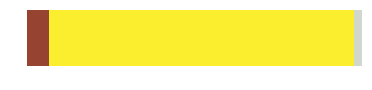

#964331
#fbee2f
#d2d7cd
[['#964331', 0.06848895434462444], ['#fbee2f', 0.9093136966126657], ['#d2d7cd', 0.02219734904270987]]


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def rgb_to_hex(rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

def find_histogram(kmeans):

    numLabels = np.arange(0, len(np.unique(kmeans.labels_)) + 1)
    (hist, _) = np.histogram(kmeans.labels_, bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

img = cv2.imread("2782a3fac55a8332deac3ced8eb24b592d992b0d.jpg") #reading image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #converting color from BGR to RGB

img = img.reshape((img.shape[0] * img.shape[1],3)) #reshaping to a list of pixels, represent as row*column,channel number
kmeans = KMeans(n_clusters=3) #cluster number
kmeans.fit(img)

hist = find_histogram(kmeans)
bar = plot_colors2(hist, kmeans.cluster_centers_)

plt.axis("off")
plt.imshow(bar)
plt.show()

colors=kmeans.cluster_centers_.astype(int)
w, h = 2, len(colors);
Matrix = [[0 for x in range(w)] for y in range(h)] 
for i in range(len(colors)):
    hexColor= rgb_to_hex(colors[i])
    print(hexColor)
    Matrix[i][0] = hexColor
    Matrix[i][1]=hist[i]
print(Matrix)

In [10]:
import cv2
from sklearn.cluster import KMeans
import numpy as np

def rgb_to_hex(rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

def find_percents(kmeans):
    numLabels = np.arange(0, len(np.unique(kmeans.labels_)) + 1)
    (hist, _) = np.histogram(kmeans.labels_, bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

def dom_colors(img_name, num):
    img = cv2.imread(img_name) #read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #converting color from BGR to RGB

    img = img.reshape((img.shape[0] * img.shape[1],3)) #reshaping to a list of pixels, represent as row*column,channel number
    kmeans = KMeans(n_clusters=3) #cluster number
    kmeans.fit(img)

    percents = find_percents(kmeans)

    colors = kmeans.cluster_centers_.astype(int)
    w, h = 2, len(colors);
    Matrix = [[0 for x in range(w)] for y in range(h)]
    domcolor = 0
    for i in range(len(colors)):
        hexColor= rgb_to_hex(colors[i])
        Matrix[i][0] = hexColor
        Matrix[i][1]=percents[i]
        if float(Matrix[i][1]) > float(Matrix[domcolor][1]):
            domcolor = i
    if num == "all":
        return Matrix #returns top 3 colors
    else: 
        return Matrix[domcolor][0] #returns only dominant color

dom_colors("6b39baceadb424e8965bd63be62690abb91847e3 copy.jpg", "one")




'#35354a'

In [ ]:
import cv2
from sklearn.cluster import KMeans
import numpy as np

def rgb_to_hex(rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

def find_percents(kmeans):
    numLabels = np.arange(0, len(np.unique(kmeans.labels_)) + 1)
    (hist, _) = np.histogram(kmeans.labels_, bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

img = cv2.imread("6e3298a2acbac293211ea5146604cdb43420eb5e copy.jpg") #read image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #converting color from BGR to RGB

img = img.reshape((img.shape[0] * img.shape[1],3)) #reshaping to a list of pixels, represent as row*column,channel number
kmeans = KMeans(n_clusters=3) #cluster number
kmeans.fit(img)

percents = find_percents(kmeans)



In [8]:
#code sometimes works, sometimes really slow and never outputs
#how to use for loop to cycle through - how to access names of files in movie poster folder
#how to connect image file names to info in movie_metadata/database bc in diff order
import cv2
from sklearn.cluster import KMeans

def rgb_to_hex(rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
    
    def dominantColors(self):
        img = cv2.imread('2782a3fac55a8332deac3ced8eb24b592d992b0d.jpg') #read image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert from BGR to RGB
        img = img.reshape((img.shape[0] * img.shape[1], 3)) #reshaping into list of pixels, row * column,channel number
        
        self.IMAGE = img #save image after operations
        
        kmeans = KMeans(n_clusters = self.CLUSTERS) #use k-means to cluster pixels into 3
        kmeans.fit(img) #fitting image
         
        self.COLORS = kmeans.cluster_centers_ #the cluster centers are our dominant colors.
        self.LABELS = kmeans.labels_ #save labels
        
        return self.COLORS.astype(int) #returning after converting to integer from float 

img = '2782a3fac55a8332deac3ced8eb24b592d992b0d.jpg'   

clusters = 4
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()

print(colors)
print(rgb_to_hex(colors[0])) #don't know if most dominant color (largest in histogram) is always first


#for i in range(clusters): 
    #hexColor = rgb_to_hex(colors[i])
    #print(hexColor)

[[253 239  47]
 [173  45  28]
 [139 144  83]
 [223 228 224]]
#fdef2f


In [2]:
from PIL import Image

image = Image.open('6e3298a2acbac293211ea5146604cdb43420eb5e copy.jpg') #reading image

#def most_frequent_color(image):

w, h = image.size
pixels = image.getcolors(w * h)

most_frequent_pixel = pixels[0]

for count, colour in pixels:
    if count > most_frequent_pixel[0]:
        most_frequent_pixel = (count, colour)

print (most_frequent_pixel)

(95103, (96, 68, 145))
